In [1]:
from IPython.display import display, Markdown

display(Markdown("## **Data Analysis  in Python**"))



## **Data Analysis  in Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.display import display, Markdown

display(Markdown("## **Import Raw Data**"))



## **Import Raw Data**

In [11]:
df = pd.read_csv("C:\Users\shrey\Downloads\blinkit_data.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (241653589.py, line 1)

In [9]:
print(df)

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv(r"C:\Users\shrey\Downloads\blinkit_data.csv")


In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [14]:
from IPython.display import display, Markdown

display(Markdown("## **Size of data**"))


## **Size of data**

In [4]:
print("size of data",df.shape)

size of data (8523, 12)


In [16]:
from IPython.display import display, Markdown

display(Markdown("## **Feild Information**"))


## **Feild Information**

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [18]:
from IPython.display import display, Markdown

display(Markdown("## **Data Types**"))


## **Data Types**

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [20]:
from IPython.display import display, Markdown

display(Markdown("## **Data Cleaning**"))


## **Data Cleaning**

In [7]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                                        'low fat': 'Low Fat',
                                                        'reg': 'Regular'})

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [12]:
from IPython.display import display, Markdown

display(Markdown("### **Bussiness Requirements**"))
display(Markdown("#### ** KPI's Requirements**"))


### **Bussiness Requirements**

#### ** KPI's Requirements**

In [10]:
#Total sales
total_sales = df['Sales'].sum()

#Average Sales
average_sales = df['Sales'].mean()

#no of items sold
no_of_item_sold = df['Sales'].count()

#Average rating
avg_ratings = df['Rating'].mean()

#Display

print(f"Total sales: ${total_sales:,.1f}")
print(f"Average Sales: ${average_sales:,.1f}")
print(f"No_of_item_sold: ${no_of_item_sold:,.1f}")
print(f"Average rating: ${avg_ratings:,.1f}")

Total sales: $1,201,681.5
Average Sales: $141.0
No_of_item_sold: $8,523.0
Average rating: $4.0


In [14]:
from IPython.display import display, Markdown

display(Markdown("## **Chart Requirements**"))

## **Chart Requirements**

In [16]:
from IPython.display import display, Markdown

display(Markdown("#### **Total Sales By Fat Content**"))

#### **Total Sales By Fat Content**

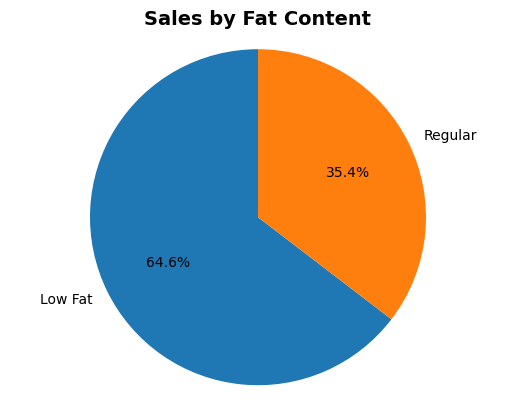

In [11]:
# Group data
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

# Create pie chart
plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%.1f%%',
    startangle=90
)

# Title and styling
plt.title('Sales by Fat Content', fontsize=14, fontweight='bold')
plt.axis('equal')  # Makes the pie chart circular
plt.show()


In [14]:
from IPython.display import display, Markdown

display(Markdown("#### **Total Sales by item Type**"))


#### **Total Sales by item Type**

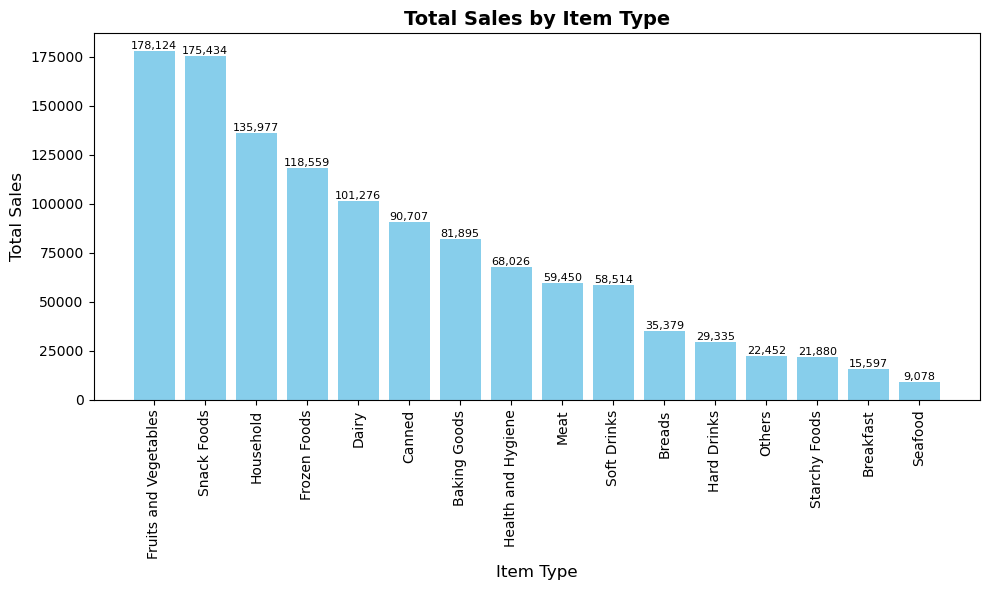

In [12]:
# Group data by 'Item Type' and sum sales
sales_by_type = (
    df.groupby('Item Type')['Sales']
      .sum()
      .sort_values(ascending=False)
)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values, color='skyblue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales by Item Type', fontsize=14, fontweight='bold')

# Add values on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

# Adjust layout and display
plt.tight_layout()
plt.show()


In [13]:
from IPython.display import display, Markdown

display(Markdown("## **Fat Content by Outlet for Total Sales**"))


## **Fat Content by Outlet for Total Sales**

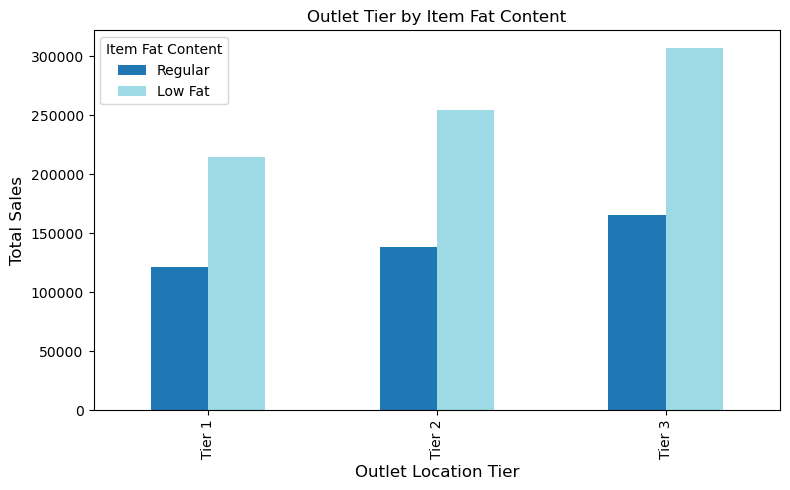

In [14]:
# Group data
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Keep only specific columns if needed
grouped = grouped[['Regular', 'Low Fat']]

# Plot
ax = grouped.plot(
    kind='bar',
    figsize=(8, 5),
    title='Outlet Tier by Item Fat Content',
    colormap='tab20'  # Gives better color variety
)

# Labels and legend
plt.xlabel('Outlet Location Tier', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


In [15]:
from IPython.display import display, Markdown

display(Markdown("## **Total Sales by Outlet Establishment**"))


## **Total Sales by Outlet Establishment**

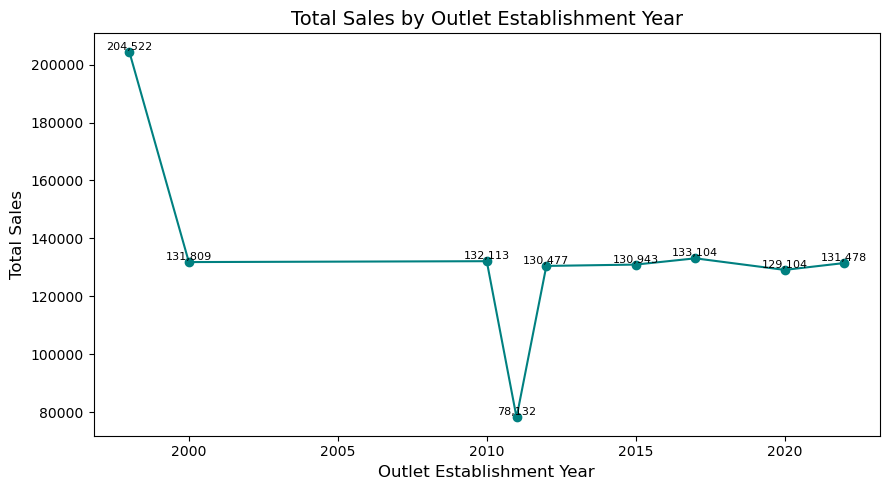

In [16]:
# Group sales data by outlet establishment year
sales_by_year = (
    df.groupby('Outlet Establishment Year')['Sales']
    .sum()
    .sort_index()
)

# Plot the sales trend
plt.figure(figsize=(9, 5))
plt.plot(
    sales_by_year.index,
    sales_by_year.values,
    marker='o',
    linestyle='-',
    color='teal'
)

# Labels and title
plt.xlabel('Outlet Establishment Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales by Outlet Establishment Year', fontsize=14)

# Annotate each point with its value
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [17]:
from IPython.display import display, Markdown

display(Markdown("## **Sales By Outlet Size**"))


## **Sales By Outlet Size**

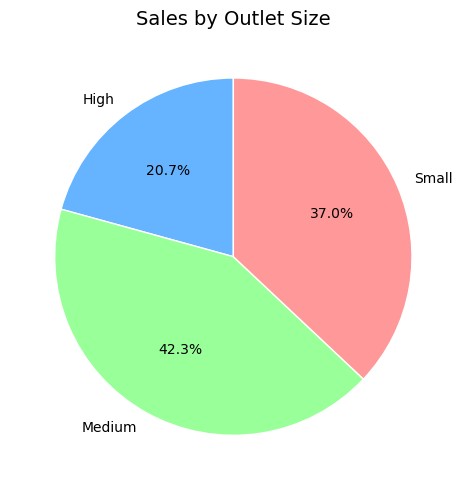

In [18]:
# Group sales data by outlet size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ff9999'],  # Custom colors
    wedgeprops={'edgecolor': 'white'}
)

# Title
plt.title('Sales by Outlet Size', fontsize=14)

# Keep chart in proper layout
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
from IPython.display import display, Markdown

display(Markdown("## **Total Sales by Outlet Location Type**"))


## **Total Sales by Outlet Location Type**

C:\Users\shrey\AppData\Local\Temp\ipykernel_4056\3654929365.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


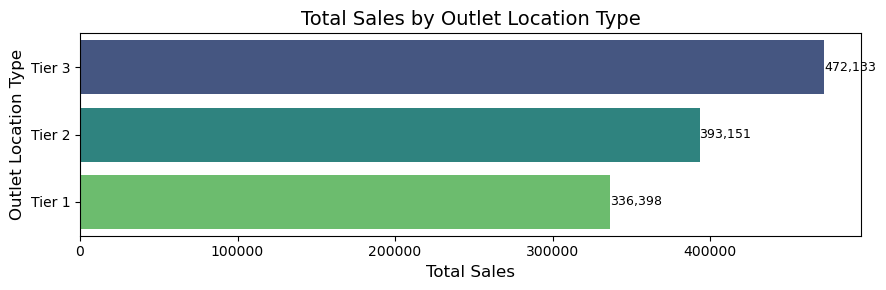

In [22]:
# Group sales data by outlet location type
sales_by_location = (
    df.groupby('Outlet Location Type')['Sales']
    .sum()
    .reset_index()
    .sort_values('Sales', ascending=False)
)

# Plot bar chart
plt.figure(figsize=(9, 3))
ax = sns.barplot(
    x='Sales',
    y='Outlet Location Type',
    data=sales_by_location,
    palette='viridis'
)

# Title and labels
plt.title('Total Sales by Outlet Location Type', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Outlet Location Type', fontsize=12)

# Annotate values on bars
for i, value in enumerate(sales_by_location['Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center', ha='left', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()
